# Generate some datasets to test the scaling code on
Just so I do not forget how I generated the tested data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def create_limit_datasets(n_spins=256, n_samples=2**14):

    # Create uncorrelated dataset
    uncorrelated_dataset = np.random.randint(0, 2, size=(n_spins, n_samples))
    np.save("input/uncorrelated_dataset", uncorrelated_dataset)

    # Create maximally correlated dataset
    correlated_dataset = np.random.randint(0, 2, n_samples)
    correlated_dataset = np.array([correlated_dataset for _ in range(n_spins)])
    np.save("input/correlated_dataset", correlated_dataset)
    
def plot_correlation(X):
    # Compute correlations
    pairwise_correlations = np.corrcoef(X)

    # Create histogram values
    bins = 50
    hist_counts, hist_edges = np.histogram(pairwise_correlations, bins=bins)
    hist_centers = [(hist_edges[i] + hist_edges[i+1]) / 2 for i in range(len(hist_edges) - 1)]

    # Change histogram counts to a density
    total_count = sum(hist_counts)
    hist_density = [hist_counts[i] / total_count for i in range(len(hist_counts))]

    # Plot histogram 
    plt.plot(hist_centers, hist_density, color="g")
    plt.xlabel("correlation coefficient")
    plt.ylabel("density")
    if min(hist_centers) < 0:
        plt.xlim(min(hist_centers), 1)
    else:
        plt.xlim(0, 1)
    plt.grid(True)
    plt.show()
    
# create_limit_datasets()

### Mixed dataset containing 4 clusters of 32 maximally correlated spins and a single cluster of 128 uncorrelated spins

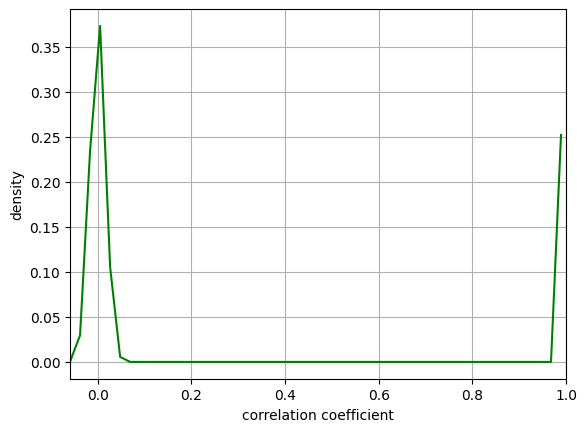

(n_spins, n_samples) = (256, 4096)


In [6]:
# Initial values
n_samples = 2**12
cluster_size = 128
n_clusters = 1
n_spins = (cluster_size * n_clusters) * 2 # Half of the spins are clustered and the other half are uncorrelated

# Array to hold dataset
dataset = np.zeros(shape=(n_spins, n_samples))

# Fill dataset
for i in range(n_clusters):
    # Generate cluster in which RVs are 100% correlated
    x = np.random.randint(0, 2, n_samples)
    cluster = np.array([x for _ in range(cluster_size)])
    
    # Add to dataset
    dataset[i*cluster_size:(i+1)*cluster_size] = cluster

# Fill rest of dataset with uncorrelated RVs
dataset[(i+1)*cluster_size:] = np.random.randint(0, 2, size=(n_spins // 2, n_samples))

plot_correlation(dataset)

print(f"(n_spins, n_samples) = {dataset.shape}")
np.save(f"mixed_correlation_Nclusters={n_clusters}_SizeClusters={cluster_size}", dataset)

### Create a dataset without any correlation structure.
Why? We want to test to what extent finding power law behaviour and thus scaling is a feature of the procedure and to what extent it is a feature of the data. 

An initial idea to testing this is the following: 
    1. Give a number of spins n
    2. u = np.uniform(1,  n*0.05) (This number represents the size of the next cluster we will create)
    3. Create a cluster of size u (np.random.rand(size=(n_samples))
    4. Add u to the array containing the data
    5. Reiterate untill we have n spins.

The resulting array should be of size (n_spins, n_samples) and should contain 100% correlated cluster with ~0% correlation between the clusters.

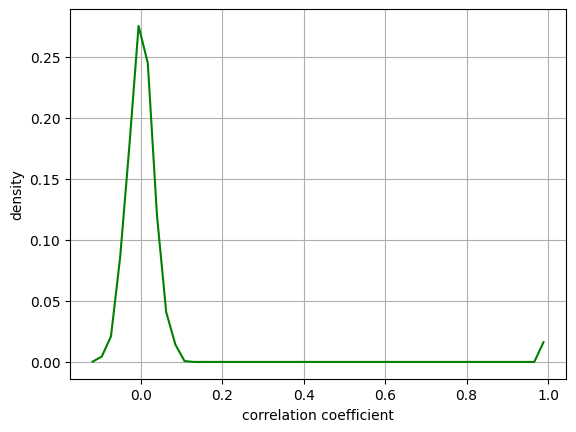

In [8]:
# Compute correlations
pairwise_correlations = np.corrcoef(dataset)

# Create histogram values
bins = 50
hist_counts, hist_edges = np.histogram(pairwise_correlations, bins=bins)
hist_centers = [(hist_edges[i] + hist_edges[i+1]) / 2 for i in range(len(hist_edges) - 1)]

# Change histogram counts to a density
total_count = sum(hist_counts)
hist_density = [hist_counts[i] / total_count for i in range(len(hist_counts))]

# Plot histogram 
plt.plot(hist_centers, hist_density, color="g")
plt.xlabel("correlation coefficient")
plt.ylabel("density")
plt.grid(True)
plt.show()

aliceblue


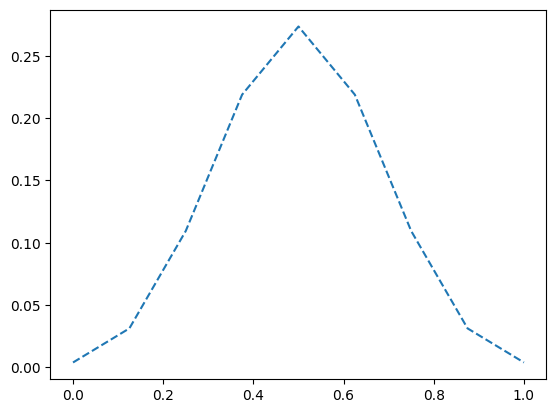

In [43]:
from scipy.stats import binom

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 8, 0.5

x = np.arange(0, n+1)

ax.plot(x/n, binom.pmf(x, n, p), '--', ms=8, label='binom pmf')
import matplotlib.colors as mcolors

print(list(mcolors.cnames.keys())[0])

In [26]:
a = np.arange(10)
a[5:]

array([], dtype=int64)